# ML Final Project - Lung Cancer Prediction


Adham Qussay, Karma El Gendy, Loujain El Ghatrefy, Nour El Hariri, & Zeina El Gendy 

**Navigate through the links below:**

1. [Data Description](#Description)
2. [EDA & Visualizations](#eda-and-visualizations)
3. [Preprocessing & Feature Engineering](#preprocess) 
4. [Splitting The Data](#splitting-the-data)
5. [Model Building](#model-building)
6. [Model Evaluation](#model-evaluation)
7. [Saving The Model](#saving-the-model)

Lung cancer remains the leading cause of cancer-related deaths worldwide, with 1.59 million fatalities recorded in 2018. While smoking is the primary cause of most lung cancer cases, exposure to air pollution has also been identified as a significant risk factor. Recent research has suggested a potential link between air pollution and an increased risk of lung cancer, even among nonsmokers.

The study, published in the journal Nature Medicine, analyzed data from over 462,000 individuals in China, tracked over an average period of six years. Participants were categorized based on their residence in either high-pollution or low-pollution areas.

Findings revealed that individuals living in high-pollution areas were more likely to develop lung cancer compared to those in low-pollution areas. Interestingly, the risk was found to be higher among nonsmokers than smokers and increased with age.

Although this study does not establish a definitive causal relationship between air pollution and lung cancer, it does indicate a potential association. Further research is necessary to confirm these findings and to understand the impact of various types and levels of air pollution on lung cancer risk.

### Columns


| Column Name                 | Description                                               |
|-----------------------------|-----------------------------------------------------------|
| Age                         | The age of the patient. (Numeric)                         |
| Gender                      | The gender of the patient. (Categorical)                  |
| Air Pollution               | The level of air pollution exposure of the patient. (Categorical) |
| Alcohol use                 | The level of alcohol use of the patient. (Categorical)    |
| Dust Allergy                | The level of dust allergy of the patient. (Categorical)   |
| Occupational Hazards        | The level of occupational hazards of the patient. (Categorical) |
| Genetic Risk                | The level of genetic risk of the patient. (Categorical)   |
| Chronic Lung Disease        | The level of chronic lung disease of the patient. (Categorical) |
| Balanced Diet               | The level of balanced diet of the patient. (Categorical)  |
| Obesity                     | The level of obesity of the patient. (Categorical)        |
| Smoking                     | The level of smoking of the patient. (Categorical)        |
| Passive Smoker              | The level of passive smoker of the patient. (Categorical) |
| Chest Pain                  | The level of chest pain of the patient. (Categorical)     |
| Coughing of Blood           | The level of coughing of blood of the patient. (Categorical) |
| Fatigue                     | The level of fatigue of the patient. (Categorical)        |
| Weight Loss                 | The level of weight loss of the patient. (Categorical)    |
| Shortness of Breath         | The level of shortness of breath of the patient. (Categorical) |
| Wheezing                    | The level of wheezing of the patient. (Categorical)       |
| Swallowing Difficulty       | The level of swallowing difficulty of the patient. (Categorical) |
| Clubbing of Finger Nails    | The level of clubbing of finger nails of the patient. (Categorical) |


## 1- Data Description <a name="Description"></a>

### Importing Libraries

In [107]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split # 4.1
from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.ensemble import RandomForestClassifier  # 4.3
from sklearn.naive_bayes import GaussianNB           # 4.4
from sklearn.neighbors import KNeighborsClassifier   # 4.5
from sklearn.svm import SVC                          # 4.6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Loading Dataset

In [108]:
df = pd.read_csv("cancer patient data sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Dataset Info

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

### Dataset Description

In [110]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### unique values in the 'Level' column

In [111]:
print('Cancer Levels: ', df['Level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['Level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


## 2- EDA & Visualizations <a name="eda-and-visualizations"></a>

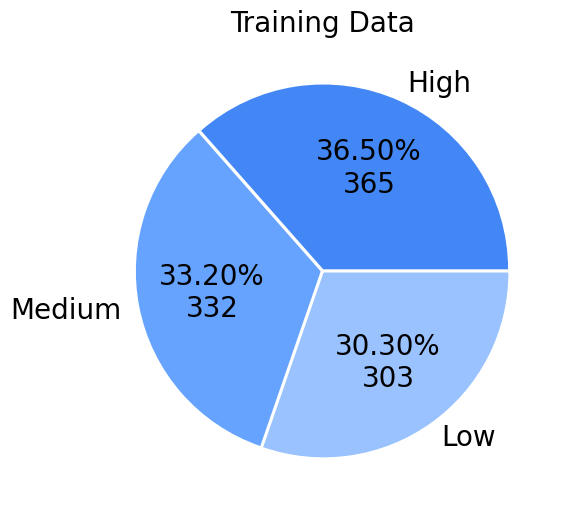

In [112]:
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)
plt.pie(df.Level.value_counts(),
        labels=mapping.keys(),
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.Level.value_counts() / 100)),
        explode=tuple(0.01 for i in range(3)),
        colors=['#4287f5', '#66a3ff', '#99c2ff'],  # Blue shades
        textprops={'fontsize': 20}
)
plt.show()

### Correlation plot

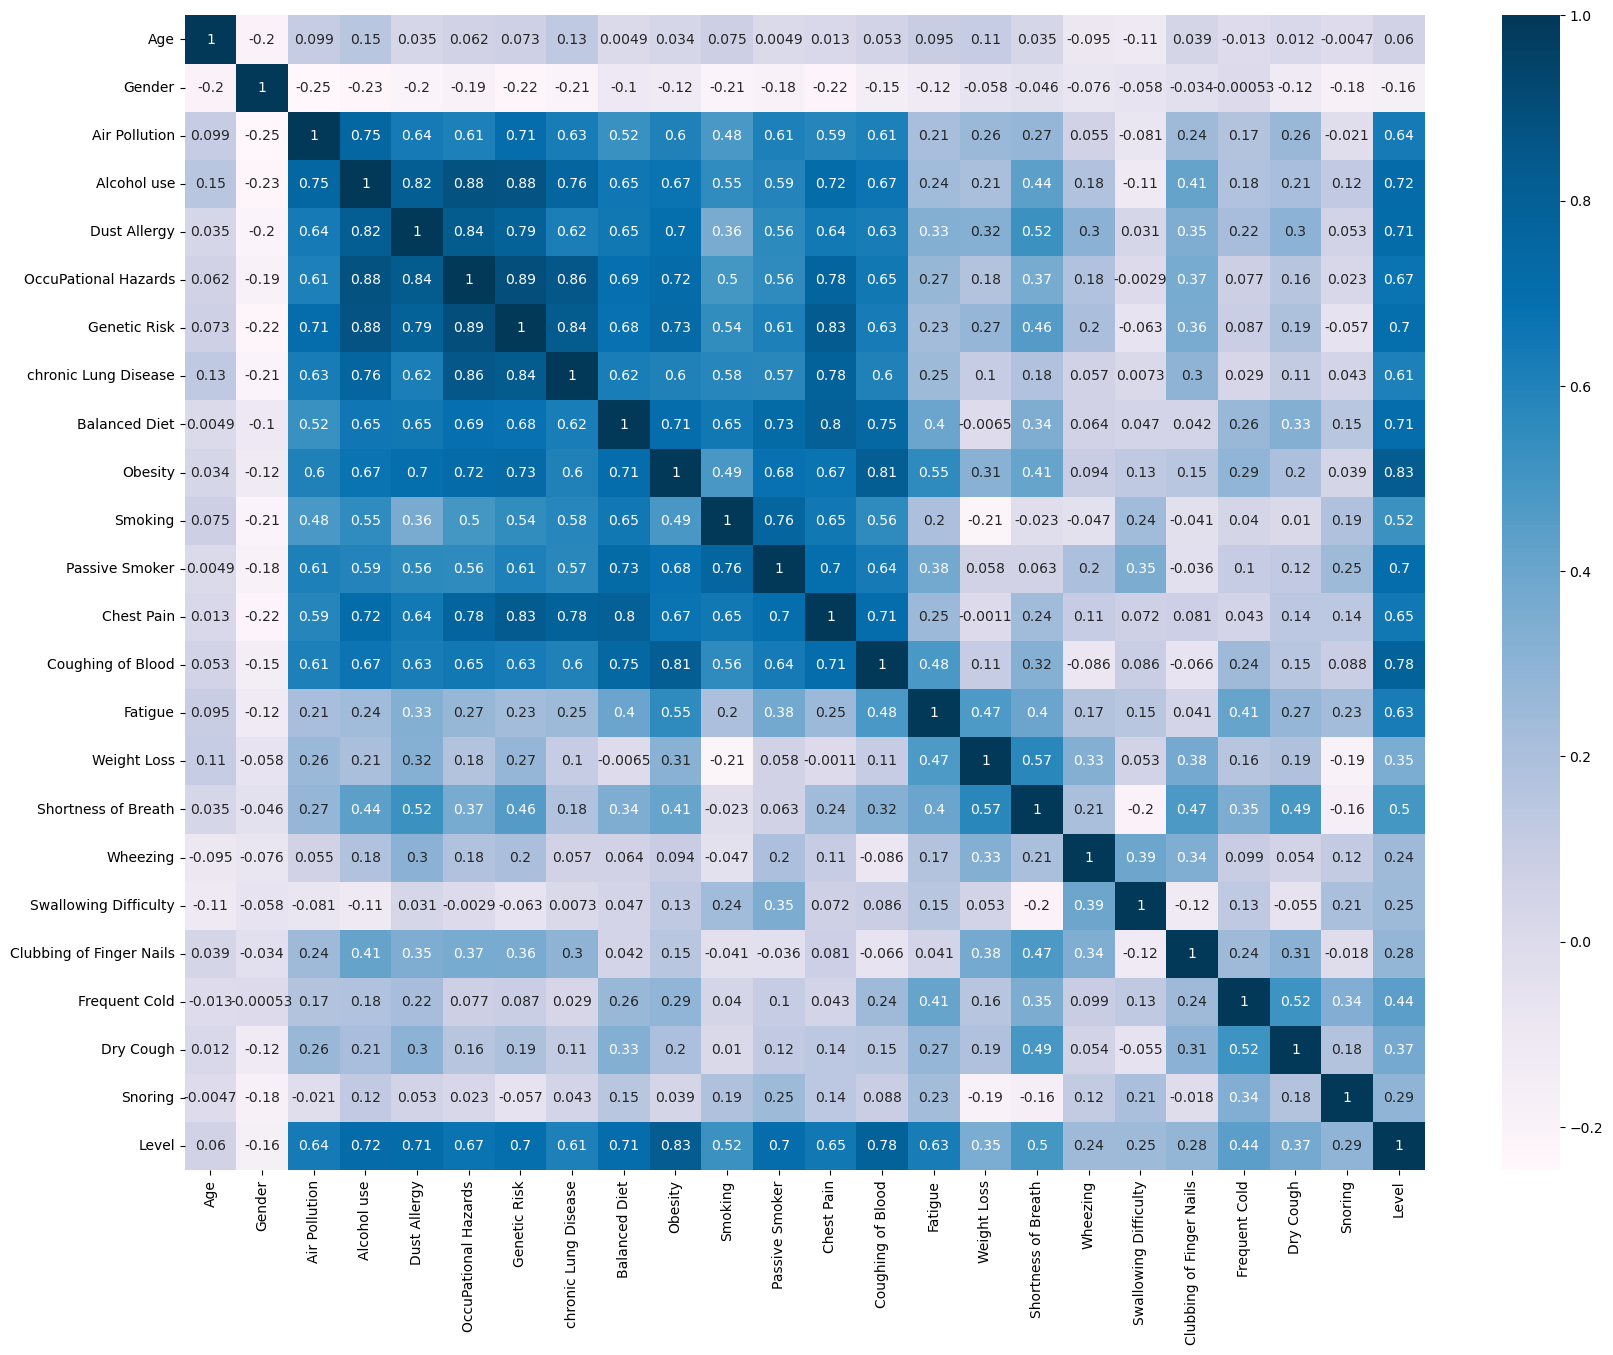

In [113]:
plt.figure(figsize=(20,15))
sns.heatmap(df.drop(columns=['index', 'Patient Id']).corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

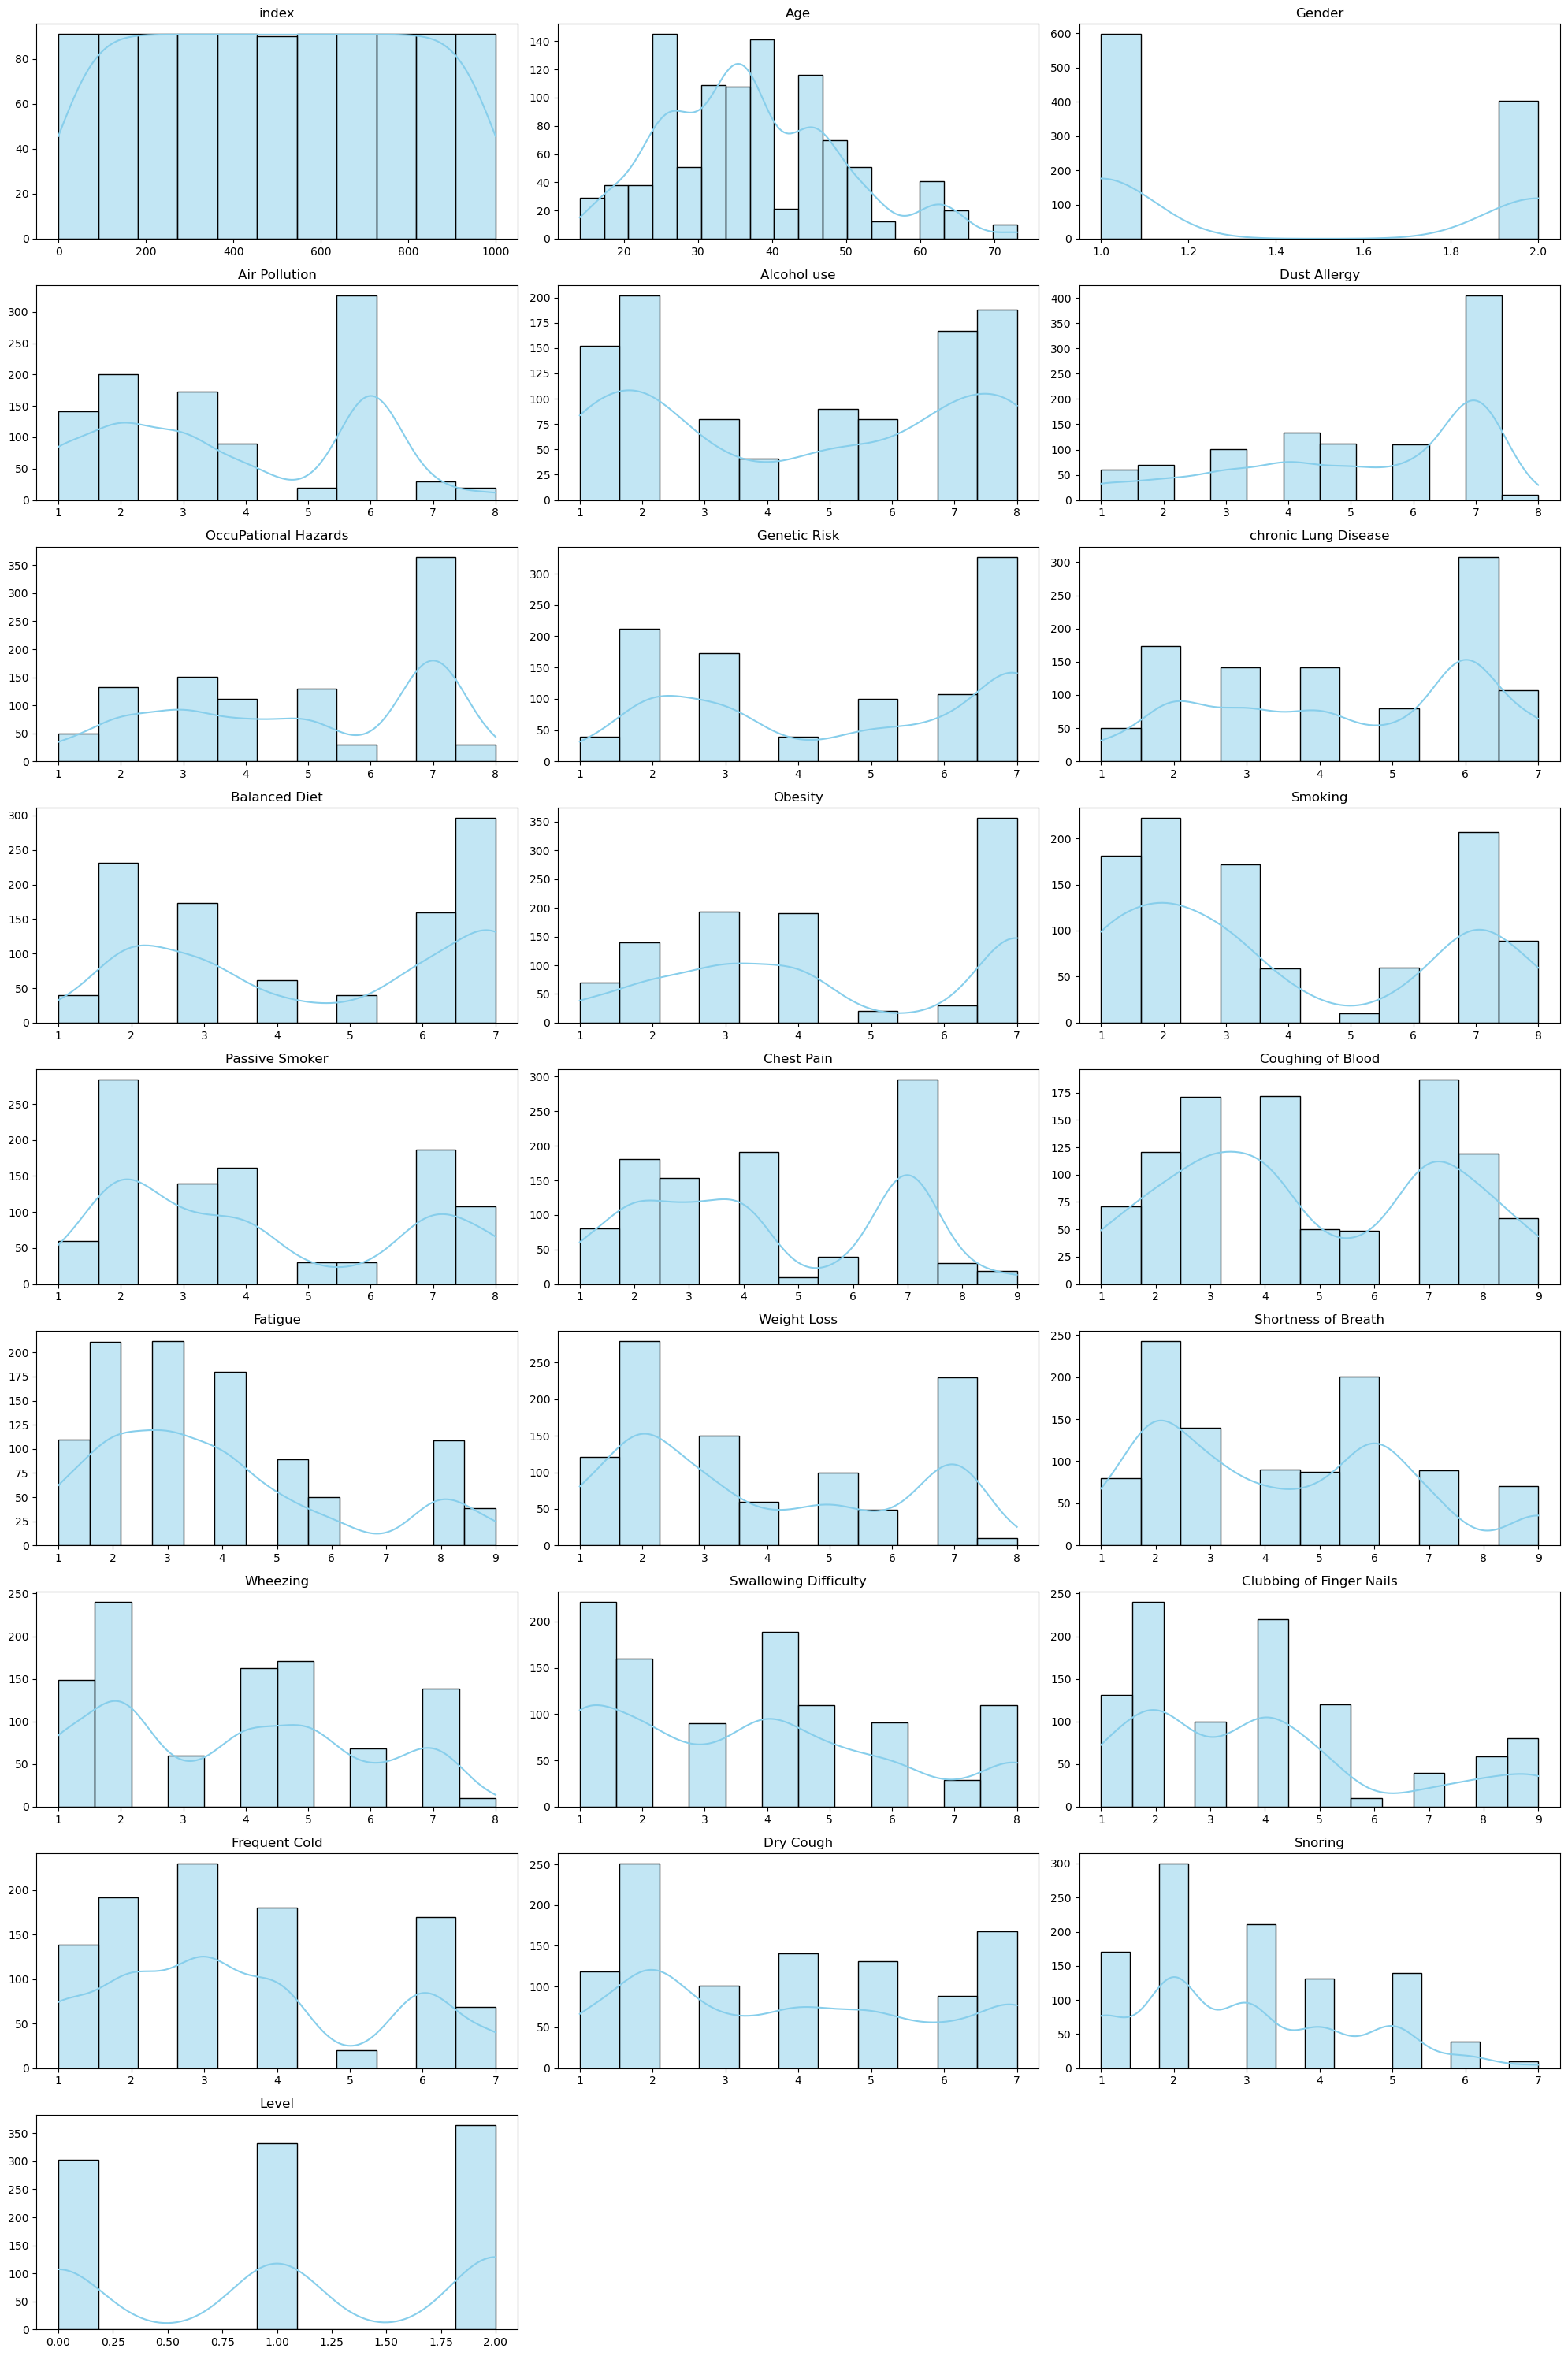

In [114]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 30))

num_plots = len(numeric_columns)

for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(9, 3, i)
    sns.histplot(df[column], color='skyblue', kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## 3- Preprocessing & Feature Engineering<a name="preprocess"></a>

### Splitting data into x and y

In [115]:
X = df.drop(columns=['Level'])  # Exclude 'Patient Id' column
y = df.Level


display(X.head())
print(y[:5])

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,P1,33,1,2,4,5,4,3,2,...,4,3,4,2,2,3,1,2,3,4
1,1,P10,17,1,3,1,5,3,4,2,...,3,1,3,7,8,6,2,1,7,2
2,2,P100,35,1,4,5,6,5,5,4,...,8,8,7,9,2,1,4,6,7,2
3,3,P1000,37,1,7,7,7,7,6,7,...,8,4,2,3,1,4,5,6,7,5
4,4,P101,46,1,6,8,7,7,7,6,...,9,3,2,4,1,4,2,4,2,3


0    0
1    1
2    2
3    2
4    2
Name: Level, dtype: int64


### Replacing levels of numeric int

In [116]:
print('Cancer Levels: ', df['Level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['Level'].unique())

Cancer Levels:  [0 1 2]
Cancer Levels:  [0 1 2]


### No Nulls

In [117]:
missing_values = df.isnull().sum()
print(missing_values)

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


### No Duplicates

In [118]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


## 4- Splitting The Data <a name="splitting-the-data"></a>

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 25) and X Testing (300, 25)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
Level
2    248
1    233
0    219
Name: count, dtype: int64


## 5- Model Building <a name="model-building"></a>

In [120]:
# Drop 'Patient Id' column from X_train and X_test
X_train = X_train.drop(columns='Patient Id')
X_test = X_test.drop(columns='Patient Id')

# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

# Predictions using K-Nearest Neighbors
knn_pred = knn_model.predict(X_test)


## 6- Model Evaluation <a name="model-evaluation"></a>

In [121]:
from sklearn.metrics import accuracy_score

# Predictions using K-Nearest Neighbors
knn_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8266666666666667


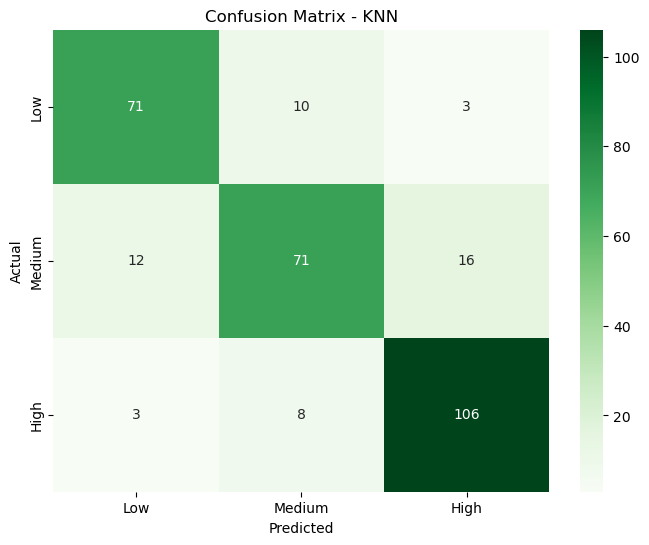

In [122]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)

# Define class names
class_names = ['Low', 'Medium', 'High']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 7- Saving The Model  <a name="saving-the-model"></a>

In [85]:
import pickle
# Save the model to a pickle file
with open('knn1.pkl', 'wb') as file:
    pickle.dump(knn_model, file)